<div dir="rtl">
    <h2 dir="auto" id="سوال-دوم">سوال دوم<a class="anchorLink" href="#سوال-دوم" style="visibility: hidden;">🔗</a></h2>
    <p dir="auto">یکی از راه‌های سود شرکت‌های فروش آنلاین، روش‌های حمل و نقل ویژه است. معمولاً شرکت‌ها سرویس‌های خاصی را به مشتریان می‌فروشند که در ازای پول بیشتر، اجناس را سریع‌تر ارسال می‌کنند. شرکتی که داده‌های آن در اختیار شما قرار داده شده است، می‌خواهد بداند که هر order، احتمالاً با چه ship mode انجام شده است. با داشتن این اطلاعات، شرکت می‌تواند با اندکی تخفیف درباره‌ی انواع مختلف حمل و نقل، مشتریان را تشویق کند تا به سراغ سرویس‌های گران‌تر بروند. برای مثال اگر یک order جدید قرار باشد به صورت استاندارد ارسال شود، شرکت می‌تواند تخفیف اندکی روی second class بگذارد تا مشتری تشویق شود و مدل حمل و نقل را یک مرحله بهتر کند.
در این بخش شما باید پس از پیش‌پردازش داده‌ها و انتخاب ویژگی‌های مناسب، مدلی آموزش دهید که برای هر order، با داشتن تمامی ویژگی‌ها، حالت ارسال (Ship Mode) را پیشبینی کند.</p>
</div>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, KFold
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.metrics import classification_report, balanced_accuracy_score,accuracy_score,f1_score,confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.svm import SVC
# sorted(SCORERS.keys())

In [69]:
fact_sales_df = pd.read_csv("../Fact&dim-csv/Fact_Sales.csv")
dim_ship_mode_df = pd.read_csv("../Fact&dim-csv/Dim_Ship_Mode.csv")
dim_priority_df = pd.read_csv("../Fact&dim-csv/Dim_Priority.csv")
dim_geography_df = pd.read_csv("../Fact&dim-csv/Dim_Geography.csv")
dim_market_df = pd.read_csv("../Fact&dim-csv/Dim_Market.csv")
dim_customer_df = pd.read_csv("../Fact&dim-csv/Dim_Customer.csv")
dim_order_df = pd.read_csv("../Fact&dim-csv/Dim_Order_Lookup.csv")
dim_date_df = pd.read_csv("../Fact&dim-csv/Dim_Date.csv")

# x= fact_sales_df.groupby(['Customer Key','Market Key','Priority Key','Ship Mode Key','Geo Key','Order Date Key'])['Quantity','Sales'].sum().reset_index()
# result = fact_sales_df

result = pd.merge(
    pd.merge(
        pd.merge(
            pd.merge(
                pd.merge(
                    pd.merge(
                        fact_sales_df, dim_ship_mode_df, on="Ship Mode Key", how="inner"
                    ),
                    dim_priority_df,
                    on="Priority Key",
                    how="inner",
                ),
                dim_market_df,
                on="Market Key",
                how="inner",
            ),
            dim_customer_df,
            on="Customer Key",
            how="inner",
        ),
        dim_geography_df,
        on="Geo Key",
        how="inner",
    ),
    dim_order_df,
    on="Order Key",
    how="inner",
)
result=pd.merge(result,dim_date_df,left_on='Order Date Key', right_on='Date Key',how="inner")
# # test 
# result = result.groupby(['Order Key']).agg({
#     'Sales': 'sum',       
#     'Quantity': 'sum',
#     'Discount': 'mean',
#     'Profit': 'sum',
#     'Ship Mode Name':'first',
#     'State':'first',
#     'Market':'first',
#     'Priority Name':'first',
#     'Day of Week':'first',
#     'Month':'first',
#     'Day':'first',
# }).reset_index()


# result.groupby(['Customer Key','Order Key']).sum(['Quantity','Discount','Profit','Shipping Cost'])
# test
result
# result[result['Ship Mode Key'] == 2]

,Row ID_x,Sales,Quantity,Discount,Profit,Shipping Cost,Is Returned,Product Key,Customer Key,Order Date Key,...,Longitude,Order ID,Row ID_y,Date,Year,Month,Day,Quarter,Date Key,Day of Week
0,84,263.920013,2,0.0,5.240,16.438999,0,6863,548,20130625,...,-99.133178,MX-2013-119970,84,2013-06-25 00:00:00.000,2013,6,25,2,20130625,2
1,492,8.880000,2,0.0,3.720,0.477000,0,5473,664,20131105,...,-99.133178,MX-2013-160997,490,2013-11-05 00:00:00.000,2013,11,5,4,20131105,2
2,490,14.600000,2,0.0,5.680,0.808000,0,4751,664,20131105,...,-99.133178,MX-2013-160997,490,2013-11-05 00:00:00.000,2013,11,5,4,20131105,2
3,3589,41.639999,2,0.0,14.960,2.624000,0,5977,492,20140730,...,-99.133178,MX-2014-154529,3588,2014-07-30 00:00:00.000,2014,7,30,3,20140730,3
4,1233,13.880000,2,0.0,1.240,1.332000,0,3659,154,20141029,...,-99.133178,MX-2014-153661,1233,2014-10-29 00:00:00.000,2014,10,29,4,20141029,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49665,8571,48.768002,3,0.2,-5.532,3.968000,0,3421,382,20120629,...,-69.483104,US-2012-102001,8571,2012-06-29 00:00:00.000,2012,6,29,2,20120629,5
49666,9019,87.456001,3,0.2,-8.784,8.248000,0,7056,157,20140904,...,-69.483104,US-2014-108371,9019,2014-09-04 00:00:00.000,2014,9,4,3,20140904,4
49667,9160,23.712000,3,0.2,-2.088,1.482000,0,3782,50,20140106,...,-69.483104,US-2014-115658,9160,2014-01-06 00:00:00.000,2014,1,6,1,20140106,1
49668,9357,44.784000,3,0.2,-11.196,2.494000,0,3865,711,20131121,...,-69.483104,US-2013-132374,9357,2013-11-21 00:00:00.000,2013,11,21,4,20131121,4


In [31]:
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.25, random_state=42, stratify=y
# )
# result_df = result.drop(columns=[,'Sales','Profit','Is Returned','Product Key'])
# result_df = result.drop(columns=['Customer Key','Order Date Key','Ship Date Key','Is Returned','Product Key'])

X = result.drop(columns=["Ship Mode Name"])
y = result["Ship Mode Name"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


num_cols = ["Quantity", "Discount", "Sales", "Profit"]
# X_train.select_dtypes(include=[np.number]).columns.tolist()
# cat_cols = ['Customer Key','Order Date Key','Ship Date Key','Geo Key','Market Key','Priority Key']
cat_cols = ["State", "Market", "Priority Name", "Day of Week", "Month", "Day"]
# X_train.select_dtypes(include=['object', 'category']).columns.tolist()


preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

kfold = KFold(n_splits=4, shuffle=True, random_state=42)

best_estimators = {}


preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Quantity', 'Discount', 'Sales', 'Profit']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['State', 'Market', 'Priority Name',
                                  'Day of Week', 'Month', 'Day'])])

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(random_state=42))
])

grid={
    "model__C":[0.1,1,10],
    "model__penalty":['l2','l1',None],
    "model__solver":['lbfgs','liblinear']
}

gsL = GridSearchCV(
    estimator=LR,
    param_grid=grid,
    cv=kfold,
    scoring='roc_auc_ovr'
)
gsL.fit(X_train, y_train)
best_estimators['LogisticRegression'] = gsL.best_estimator_




# LR.fit(X_train, y_train)
print("Accuracy:", gsL.score(X_test, y_test))
# best_estimators

In [ ]:
from sklearn.tree import DecisionTreeClassifier
best_params ={}
leaderborad=[]
DT = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(random_state=42))
])

grid={
    "model__max_depth":[5,8,10,12,15,17,20],
    "model__min_samples_split":[5,8,10,12]
}
scoring ={'roc_auc_ovr':'roc_auc_ovr','f1_macro':'f1_macro','roc_auc_ovr_weighted':'roc_auc_ovr_weighted','f1_micro':'f1_micro'}
gsD = GridSearchCV(
    estimator=DT,
    param_grid=grid,
    cv=kfold,
    scoring=scoring,
    refit="f1_macro",  
)
gsD.fit(X_train, y_train)
best_estimators['DecisionTreeClassifier'] = gsD.best_estimator_
best_params['DecisionTreeClassifier'] = gsD.best_params_
leaderborad.append({
    "model":"DecisionTreeClassifier",
    "metrics":gsD.cv_results_
})

# DT.fit(X_train, y_train)
# print("Accuracy-test:", gsD.score(X_test, y_test))
# print("Accuracy-train:", gsD.score(X_train, y_train))

print("CV scores (best index):")
print({k: gsD.cv_results_[f'mean_test_{k}'][gsD.best_index_] for k in scoring.keys()})

best_model = gsD.best_estimator_
print("Test accuracy:", best_model.score(X_test, y_test))
print("Train accuracy:", best_model.score(X_train, y_train))

best_params
# print(best_estimators)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])
grid={
    "model__max_depth":[2,3,5,8,10,12],
    "model__min_samples_split":[2,5,8,10]
}

gs = GridSearchCV(
    estimator=RF,
    param_grid=grid,
    cv=kfold,
    scoring=scoring,
    refit="f1_macro", 
)
gs.fit(X_train, y_train)
best_estimators['RandomForest'] = gs.best_estimator_
best_params['RandomForest'] = gs.best_params_
leaderborad.append({
    "model":"RandomForest",
    "metrics":gs.cv_results_
})
# RF.fit(X_train, y_train)
# best_estimators
print("CV scores (best index):")
print({k: gs.cv_results_[f'mean_test_{k}'][gs.best_index_] for k in scoring.keys()})

best_model = gs.best_estimator_
print("Test accuracy:", best_model.score(X_test, y_test))
print("Train accuracy:", best_model.score(X_train, y_train))

best_params

In [ ]:
# %pip install graphviz

from xgboost import XGBClassifier, plot_tree
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE


le = LabelEncoder()
y_enc = le.fit_transform(yCat)


# X_XG, y_XG = SMOTE().fit_resample(X, y_enc)
X_XG = XCat
y_XG = y_enc

X_trainXG, X_testXG, y_trainXG, y_testXG = train_test_split(
    X_XG, y_XG, stratify=y_XG, random_state=42
)

#

XGBCl = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        (
            "model",
            XGBClassifier(
                random_state=42,
                objective="multi:softprob",
                tree_method="hist",
                enable_categorical=True,
                n_estimators=800,
                learning_rate=0.001,
                max_depth=10
            ),
        ),
    ]
)

# grid={
#     "model__n_estimators":[400,800],
#     "model__learning_rate":[0.02,0.2],
#     "model__subsample":[0.5]
#     # "model__sample_weight":[sample_weight]
#     # "model__max_depth":[9,10]
# }
model = XGBCl.named_steps["model"]

XGBCl.fit(X_trainXG, y_trainXG)
print("Train accuracy:", XGBCl.score(X_trainXG, y_trainXG))
print("Test accuracy:", XGBCl.score(X_testXG, y_testXG))
ax = plot_tree(
    model,
    num_trees=10,
)
print(model.feature_importances_)

In [108]:
from catboost import CatBoostClassifier, Pool
from imblearn.combine import SMOTEENN

selected_features = [
    "Sales",
    "Quantity",
    "Discount",
    "Profit",
    "Priority Name",
    "Market",
    "Segment",
    "City",
    "State",
    "Country",
    "Region",
    "Year",
    "Month",
    "Day",
    "Day of Week",
    # "profit_margin",
    # "sales_per_unit",
]
# selected_features = ['Sales',
#   'Discount',
#   'Shipping Cost',
#   'Priority Name',
#   'Market',
#   'Segment',
#   'City',
#   'State',
#   'Year',
#   'Month',
#   'Day',
#   'Day of Week']


XCat = result.drop(columns=["Ship Mode Name"])[selected_features]
yCat = result["Ship Mode Name"].astype("category")

              
XCat["profit_margin"] = XCat["Profit"] / (XCat["Sales"] + 1e-6)
XCat["sales_per_unit"] = XCat["Sales"] / (XCat["Quantity"] + 1e-6)
features_to_cal = XCat.columns.to_list()
# from sklearn.preprocessing import RobustScaler
# num_cols = XCat.select_dtypes(exclude=['category']).columns.tolist()
# features_to_cal = ['Discount',
#   'Priority Name',
#   'Market',
#   'Segment',
#   'City',
#   'State',
#   'Country',
#   'Year',
#   'Month',
#   'Day',
#   'Day of Week',
#   'profit_margin']
XCat = XCat[features_to_cal]

cat_cols =["Priority Name",
    "Market",
    "Segment",
    "City",
    "State",
    "Country",
    "Region",
    "Year",
    "Month",
    "Day",
    "Day of Week",]
for c in cat_cols:
    if c in X.columns:
        X[c] = X[c].astype('category')    
# scaler = RobustScaler()
# XCat[num_cols] = scaler.fit_transform(XCat[num_cols])

In [101]:
features_to_cal

['Discount',
 'Priority Name',
 'Market',
 'Segment',
 'City',
 'State',
 'Country',
 'Year',
 'Month',
 'Day',
 'Day of Week',
 'profit_margin']

------------------ classification_report TRAIN ------------------
                precision    recall  f1-score   support

   First Class       0.78      0.94      0.85      5424
      Same Day       0.68      0.90      0.77      1965
  Second Class       0.83      0.87      0.85      7479
Standard Class       0.97      0.88      0.93     22384

      accuracy                           0.89     37252
     macro avg       0.82      0.90      0.85     37252
  weighted avg       0.90      0.89      0.89     37252



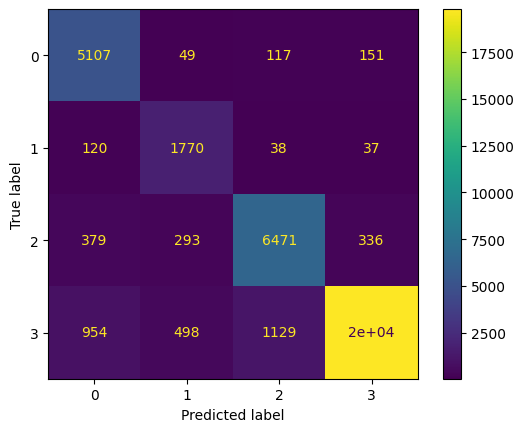

------------------ classification_report TEST ------------------
                precision    recall  f1-score   support

   First Class       0.57      0.69      0.62      1808
      Same Day       0.38      0.70      0.49       655
  Second Class       0.65      0.64      0.64      2493
Standard Class       0.90      0.79      0.84      7462

      accuracy                           0.74     12418
     macro avg       0.62      0.70      0.65     12418
  weighted avg       0.77      0.74      0.75     12418



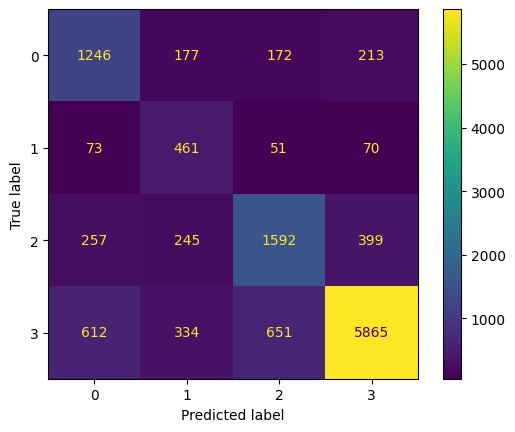

,Feature Id,Importances
0,City,32.767742
1,Priority Name,23.780892
2,Day,22.539395
3,State,8.246302
4,Month,4.990666
5,Year,2.647346
6,Day of Week,2.379564
7,Country,1.258762
8,Segment,0.719784
9,Market,0.401232


In [107]:
from sklearn.decomposition import PCA


XC_train, XC_test, yC_train, yC_test = train_test_split(
    XCat, yCat, test_size=0.25, random_state=42, stratify=yCat
)

# X_bal = XCat.copy()
# y_bal = LabelEncoder().fit_transform(yCat)  # CatBoost needs numeric for SMOTE

# sm = SMOTEENN(random_state=42)
# X_res, y_res = sm.fit_resample(X_bal, y_bal)

# print("Before:", np.bincount(y_bal))
# print("After:", np.bincount(y_res))

train_pool = Pool(XC_train, yC_train, cat_features=cat_cols)
valid_pool = Pool(XC_test, yC_test, cat_features=cat_cols)
catModel = CatBoostClassifier(
    iterations=500,
    loss_function="MultiClass",
    eval_metric="TotalF1:average=Macro",    
    depth=2,
    learning_rate=0.1,
    l2_leaf_reg=15,
    random_strength=5,
    # rsm=0.6,
    cat_features=cat_cols,
    verbose=False,
    random_state=42,
    auto_class_weights='Balanced',
)

catModel.fit(
    # XC_train, yC_train,
    train_pool,
    eval_set=valid_pool,
    use_best_model=True,
    early_stopping_rounds=100
)

catModel.fit(XC_train, yC_train)
y_p = catModel.predict(XC_train)
y_t = catModel.predict(XC_test)
print(f"------------------ classification_report TRAIN ------------------")
print(classification_report(yC_train, y_p))
ConfusionMatrixDisplay(confusion_matrix(yC_train, y_p)).plot()
plt.show()

print(f"------------------ classification_report TEST ------------------")
print(classification_report(yC_test, y_t))
ConfusionMatrixDisplay(confusion_matrix(yC_test, y_t)).plot()
plt.show()

catModel.get_feature_importance(prettified=True)





In [ ]:
import sys

catModel.select_features(
                XCat,
                y=yCat,
                eval_set=valid_pool,
                features_for_select=features_to_cal,
                num_features_to_select=12,
                algorithm=None,
                steps=2,
                shap_calc_type=None,
                train_final_model=False,
                verbose=None,
                logging_level=None,
                plot=False,
                log_cout=sys.stdout,
                log_cerr=sys.stderr)



Step #1 out of 1

bestTest = 0.893079662
bestIteration = 900

Shrink model to first 901 iterations.
Feature #10 eliminated
Feature #1 eliminated
Feature #0 eliminated
Feature #3 eliminated
Feature #16 eliminated


{'selected_features': [2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15],
 'eliminated_features_names': ['Region',
  'Quantity',
  'Sales',
  'Profit',
  'sales_per_unit'],
 'loss_graph': {'main_indices': [0],
  'removed_features_count': [0, 1, 2, 3, 4, 5],
  'loss_values': [0.4123519155832886,
   0.411729835808397,
   0.4112570341016238,
   0.41123067916330547,
   0.4112643357297274,
   0.4113202505126998]},
 'eliminated_features': [10, 1, 0, 3, 16],
 'selected_features_names': ['Discount',
  'Priority Name',
  'Market',
  'Segment',
  'City',
  'State',
  'Country',
  'Year',
  'Month',
  'Day',
  'Day of Week',
  'profit_margin']}

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(catModel, XCat, yCat, cv=kfold, scoring='f1_macro')
print("CV F1_macro:", scores.mean(), "+/-", scores.std())


CV F1_macro: 0.7825619380243267 +/- 0.0034894801556227986


In [ ]:
train_pool = Pool(XC_train, yC_train, cat_features=cat_cols)
valid_pool = Pool(XC_test, yC_test, cat_features=cat_cols)
catModel = CatBoostClassifier(
    loss_function="MultiClass",
    eval_metric="TotalF1:average=Macro",
    # rsm=0.6,
    cat_features=cat_cols,
    verbose=False,
    random_state=42,
    auto_class_weights="Balanced",
)

# catModel.fit(
#     # XC_train, yC_train,
#     train_pool,
#     eval_set=valid_pool,
#     use_best_model=True,
#     early_stopping_rounds=100
# )

# catModel.fit(XC_train, yC_train)
gs = GridSearchCV(
    estimator=catModel,
    param_grid={
        "iterations":500,
    "depth":2,
    "learning_rate":0.1,
    "l2_leaf_reg":15,
    "random_strength":5},
    cv=kfold,
    scoring=scoring,
    refit="f1_macro",
)
gs.fit(XC_train, yC_train)
best_estimators["RandomForest"] = gs.best_estimator_
best_params["RandomForest"] = gs.best_params_
leaderborad.append({"model": "RandomForest", "metrics": gs.cv_results_})
# RF.fit(X_train, y_train)
# best_estimators
print("CV scores (best index):")
print({k: gs.cv_results_[f"mean_test_{k}"][gs.best_index_] for k in scoring.keys()})

best_model = gs.best_estimator_
print("Test accuracy:", best_model.score(X_test, y_test))
print("Train accuracy:", best_model.score(X_train, y_train))

best_params

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), XC_train.select_dtypes(include=[np.number]).columns.tolist()),   
        ('cat', OneHotEncoder(handle_unknown='ignore'), XC_train.select_dtypes(include=['category']).columns.tolist()) 
    ]
)


KNN = Pipeline(steps=[
    ('preprocessor', preprocessor1),
    ('model', KNeighborsClassifier())
])
grid={
    "model__n_neighbors":[3,4,5,6],
    "model__weights":['distance'],
    # "model__n_jobs":[2,3]
}

gsKNN = GridSearchCV(
    estimator=KNN,
    param_grid=grid,
    cv=kfold,
    scoring=scoring,
    refit="f1_macro"
)
gsKNN.fit(XC_train, yC_train)
best_estimators['KNeighborsClassifier'] = gsKNN.best_estimator_
best_params['KNeighborsClassifier'] = gsKNN.best_params_

# # RF.fit(X_train, y_train)
# # best_estimators
print("CV scores (best index):")
print({k: gsKNN.cv_results_[f'mean_test_{k}'][gsKNN.best_index_] for k in scoring.keys()})

best_model = gsKNN.best_estimator_
print("Test accuracy:", best_model.score(XC_test, yC_test))
print("Train accuracy:", best_model.score(XC_train, yC_train))
best_params
# best_estimators

In [ ]:
# %pip install graphviz

from xgboost import XGBClassifier, plot_tree
from sklearn.utils.class_weight import compute_class_weight
X_XG = XCat
y_XG = y_enc
XC_train, XC_test, yC_train, yC_test = train_test_split(
    X_XG, y_enc, test_size=0.25, random_state=42, stratify=y_enc
)

XGBCl = Pipeline(
    steps=[
        ("preprocessor", preprocessor1),
        (
            "model",
            XGBClassifier(
                random_state=42,
                objective="multi:softprob",
                # tree_method="hist",
                enable_categorical=True,
                n_estimators=800,
                learning_rate=0.001,
                max_depth=10,
                cat_cols=['Priority-Geo-Market']
            ),
        ),
    ]
)

# grid={
#     "model__n_estimators":[400,800],
#     "model__learning_rate":[0.02,0.2],
#     "model__subsample":[0.5]
#     # "model__sample_weight":[sample_weight]
#     # "model__max_depth":[9,10]
# }
model = XGBCl.named_steps["model"]

XGBCl.fit(XC_train, yC_train)
print("Train accuracy:", XGBCl.score(XC_train, yC_train))
print("Test accuracy:", XGBCl.score(XC_test, yC_test))
ax = plot_tree(
    model,
    num_trees=10,
)
print(model.feature_importances_)
# model.get_feature_importance()

In [ ]:
# %pip install imblearn

from xgboost import XGBClassifier



X_XG = X
y_XG = y_enc


X_trainXG, X_testXG, y_trainXG, y_testXG = train_test_split(X_XG, y_XG, stratify=y_XG, random_state=42)

# classes = np.unique(y_XG)
# weights = compute_class_weight('balanced', classes=classes, y=y_XG)
# class_weights = dict(zip(classes, weights))
# sample_weight = [class_weights[y] for y in y_XG]
# X_XG, y_XG
preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), XC_train.select_dtypes(include=[np.number]).columns.tolist()),   
        ('cat', OneHotEncoder(handle_unknown='ignore'), XC_train.select_dtypes(include=['category']).columns.tolist()) 
    ]
)
XGBC = Pipeline(steps=[
    ('preprocessor', preprocessor1),
    ('model', XGBClassifier(random_state=42,objective='multi:softprob'))
])

grid={
    "model__n_estimators":[1000,1100],
    "model__learning_rate":[0.3,0.2],
    "model__subsample":[0.5]
    # "model__sample_weight":[sample_weight]
    # "model__max_depth":[9,10]
}

gsXGBC = GridSearchCV(
    estimator=XGBC,
    param_grid=grid,
    cv=kfold,
    scoring=scoring,
    refit="f1_macro", 
)
gsXGBC.fit(X_trainXG, y_trainXG)
best_estimators['XGBClassifier'] = gsXGBC.best_estimator_
best_params['XGBClassifier'] = gsXGBC.best_params_
leaderborad.append({
    "model":"XGBClassifier",
    "metrics":gsXGBC.cv_results_
})
# # RF.fit(X_train, y_train)
# # best_estimators
print("CV scores (best index):")
print({k: gsXGBC.cv_results_[f'mean_test_{k}'][gsXGBC.best_index_] for k in scoring.keys()})

best_model = gsXGBC.best_estimator_
print("Test accuracy:", best_model.score(X_testXG, y_testXG))
print("Train accuracy:", best_model.score(X_trainXG, y_trainXG))
best_params
# print(gsXGBC.best_estimator_)

# # XGBC.fit(X_trainXG, y_trainXG)
# # print("Accuracy:", gsXGBC.score(X_testXG, y_testXG))
# print("Accuracy-test:", gsXGBC.score(X_testXG, y_testXG))
# print("Accuracy-train:", gsXGBC.score(X_trainXG, y_trainXG))

# y_pred = gsXGBC.predict(X_testXG)

# If you want original labels back:
# y_pred_orig = le.inverse_transform(y_pred)
# y_test_orig = le.inverse_transform(y_testXG)

# y_pred
# best_estimators
# class_weights



In [ ]:
# from sklearn.svm import SVC

mSVC = Pipeline(steps=[("preprocessor", preprocessor1), ("model", SVC(random_state=42))])

grid = {
    # "linear", 
    "model__kernel": ["rbf"],
    "model__C": [10],
    # "model__C": [0.1, 1, 10],
    # "model__gamma": [0.01, 0.1, 1],
    # "model__probability": [True],
}

gsSVM = GridSearchCV(estimator=mSVC, param_grid=grid, cv=kfold,scoring='f1_macro')
gsSVM.fit(XC_train, yC_train)
best_estimators["SVC"] = gsSVM.best_estimator_

# RF.fit(X_train, y_train)
print("Accuracy:", gsSVM.score(XC_test, yC_test))
# best_estimators

In [ ]:
leaderborad = []
for name, best_pipe in best_estimators.items():
    y_pred = None
    temp_X_train = X_train
    temp_y_train = y_train
    temp_X_test = X_test
    temp_y_test = y_test

    if name == "XGBClassifier":
        temp_X_train = X_trainXG
        temp_y_train = y_trainXG
        temp_X_test = X_testXG
        temp_y_test = y_testXG

    # best_pipe.fit(temp_X_train,y_train)
    y_pred = best_pipe.predict(temp_X_test)

    # if name == "XGBClassifier":
    #     roc_auc_score_Res = None
    #     # cross_val_score(best_pipe,X,y_enc,cv=kfold,scoring='roc_auc_ovr').mean()
    # else:
    #     roc_auc_score_Res = None
    #     # cross_val_score(best_pipe,X,y,cv=kfold,scoring='roc_auc_ovr').mean()
    labels=dim_ship_mode_df.sort_values(by='Ship Mode Key', ascending=True)['Ship Mode Name']
    print(f"---------- {name}-test ----------")
    classification_report_Res = classification_report(
        y_true=temp_y_test,
        y_pred=y_pred,
        target_names=labels,
        zero_division=False,
        # output_dict=True
    )
    balanced_accuracy_score_res = balanced_accuracy_score(
        temp_y_test,
        y_pred,
    )
    print(classification_report_Res)
    # print(f"---- \nroc_auc_score: {roc_auc_score_Res}")
    print(f"---- \nbalanced_accuracy_score: {balanced_accuracy_score_res} \n----\n")
    print(f"---------- {name}-train ----------")
    y_pred_train = best_pipe.predict(temp_X_train)
    
    classification_report_Res = classification_report(
        y_true=temp_y_train,
        y_pred=y_pred_train,
        target_names=labels,
        zero_division=False,
    )
    balanced_accuracy_score_res = balanced_accuracy_score(
        temp_y_train,
        y_pred_train,
    )
    print(classification_report_Res)
    # print(f"---- \nroc_auc_score: {roc_auc_score_Res}")
    print(f"---- \nbalanced_accuracy_score: {balanced_accuracy_score_res} \n----\n")
    # print(
    #     f"{confusion_matrix(temp_y_test,y_pred)} \n----\n"
    # )

    # leaderborad.append(res)


# leaderborad_df = pd.DataFrame(leaderborad)
# leaderborad_df

# balanced_accuracy_score, roc_auc_score